|Challenge Set 4|
|---------------|
|Topic: |Linear Learning|
|Date: |07/25/2016|
|Name: |Jessica Cox|

# Challenge 1

Generate (fake) data that is linearly related to log(x). You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.) Simulate some data from this model. Then fit two models to it: quadratic (second degree polynomial) logarithmic (log(x)) (The second one should fit really well, since it has the same form as the underlying model!)

In [92]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.formula.api as sm

In [151]:
#generate random data
x = np.random.rand(500)*500
epsilon = np.random.normal(0,5, 500)
B0 = 1
B1 = 10

#log model
y = [[B0 + B1*np.log(x[i]) + epsilon[i]] for i in range(len(x))]

In [157]:
#create dataframe
df = pd.DataFrame(data = y)
df.columns = ['y']
df['x'] = [i for i in x]
df['epsilon'] = [i for i in epsilon]
df['x_poly2'] = [i**2 for i in x]
df['x_log'] = np.log(x)

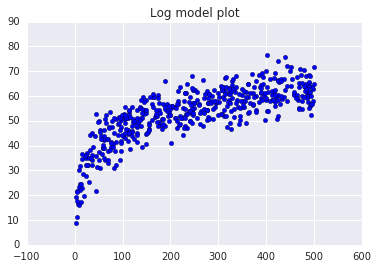

In [158]:
#plot log model
plt.scatter(x, y)
plt.title('Log model plot')
plt.show()

In [162]:
#create quad model
y_poly2, X_poly2 = dmatrices('y ~ x_poly2', data=df, return_type='dataframe')
model_poly2 = sm.OLS(y_poly2, X_poly2)
results_poly2 = model_poly2.fit()
pred_poly2 = results_poly2.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1668.
Date:                Mon, 25 Jul 2016   Prob (F-statistic):          4.24e-161
Time:                        21:43:01   Log-Likelihood:                -1538.8
No. Observations:                 500   AIC:                             3082.
Df Residuals:                     498   BIC:                             3090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7424      1.297      0.573      0.567        -1.805     3.290
x_log         10.0171      0.245     40.844      0.000         9.535    10.499
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.519
Skew:                          -0.032   Prob(JB):                        0.772
Kurtosis:                       2.856   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
y_log, X_log = dmatrices('y ~ x_log', data=df, return_type='dataframe')
model_log = sm.OLS(y_log, X_log)
results_log = model_log.fit()
pred_log = results_log.predict(X)
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1668.
Date:                Mon, 25 Jul 2016   Prob (F-statistic):          4.24e-161
Time:                        21:43:36   Log-Likelihood:                -1538.8
No. Observations:                 500   AIC:                             3082.
Df Residuals:                     498   BIC:                             3090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7424      1.297      0.573      0.567        -1.805     3.290
x_log         10.0171      0.245     40.844      0.000         9.535    10.499
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.519
Skew:                          -0.032   Prob(JB):                        0.772
Kurtosis:                       2.856   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)
Split the data into a training and test set.
Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.
(You could use sklearn.metrics.mean_squared_error.)

In [168]:
#generate random data
x = np.random.rand(500)*500
epsilon = np.random.normal(1, 5, 500)
B0 = 1
B1 = 10
B2 = 5

#polynomial model
y = [[B0 + B1*x[i] + B2*(x[i]**2) + epsilon[i]] for i in range(len(x))]

In [169]:
#create dataframe
df_2 = pd.DataFrame(data = y)
df_2.columns = ['y']
df_2['x'] = [i for i in x]
df_2['epsilon'] = [i for i in epsilon]
df_2['x_poly2'] = [i**2 for i in x]
df_2['x_log'] = np.log(x)

In [177]:
#split into training and test set
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

y, X = dmatrices('y ~ x', data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

#fitting model to training set
model_train = LinearRegression().fit(X_train, y_train)

In [178]:
from sklearn import metrics

#calculate MSE on training set
print(metrics.mean_squared_error(y_train,model.predict(X_train)))

#calculate MSE on test set
print(metrics.mean_squared_error(y_test,model.predict(X_test)))

48.8262960179
39.1022804847


The MSE is lower on the the test set, indicating a good fit developed by the traning model

# Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:
training error  
test error  
R squared  
AIC  

In [175]:
df_2['x_poly0'] = [i**0 for i in x]
df_2['x_poly1'] = [i**1 for i in x]
df_2['x_poly2'] = [i**2 for i in x]
df_2['x_poly3'] = [i**3 for i in x]
df_2['x_poly4'] = [i**4 for i in x]
df_2['x_poly5'] = [i**5 for i in x]
df_2['x_poly6'] = [i**6 for i in x]
df_2['x_poly7'] = [i**7 for i in x]

In [176]:
df_2.head()

,y,x,epsilon,x_poly2,x_log,x_poly0,x_poly1,x_poly3,x_poly4,x_poly5,x_poly6,x_poly7
0,126570.976837,158.105998,1.383336,24997.506704,5.063266,1.0,158.105998,3.952256e+06,6.248753e+08,9.879654e+10,1.562033e+13,2.469667e+15
1,268175.692435,230.592748,3.687682,53173.015454,5.440653,1.0,230.592748,1.226131e+07,2.827370e+09,6.519709e+11,1.503398e+14,3.466726e+16
2,158883.491475,177.259567,5.124997,31420.954161,5.177615,1.0,177.259567,5.569665e+06,9.872764e+08,1.750042e+11,3.102117e+13,5.498798e+15
3,83826.952138,128.476377,10.291357,16506.179403,4.855745,1.0,128.476377,2.120654e+06,2.724540e+08,3.500390e+10,4.497174e+12,5.777806e+14
4,726907.325508,380.288209,7.833466,144619.121990,5.940929,1.0,380.288209,5.499695e+07,2.091469e+10,7.953610e+12,3.024664e+15,1.150244e+18


In [181]:
#split into test and train
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

y, X = dmatrices('y ~ x_poly0 + x_poly1 + x_poly2 + x_poly3 + x_poly4 + x_poly5 + x_poly6 + x_poly7', 
                 data=df_2, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [182]:
training_error = []
test_error = []
rsqrd = []
aic = []

for i in range(8):
    #model
    model = sm.OLS(y_train, X_train['x_poly{}'.format(i)]).fit()
    #training error list for each poly
    training_error.append(metrics.mean_squared_error(y_train,model.predict(X_train['x_poly{}'.format(i)])))
    #testing error list for each poly
    test_error.append(metrics.mean_squared_error(y_test,model.predict(X_test['x_poly{}'.format(i)])))
    #rsqrd list for each poly
    rsqrd.append(model.rsquared)
    #aic list for each poly
    aic.append(model.aic)

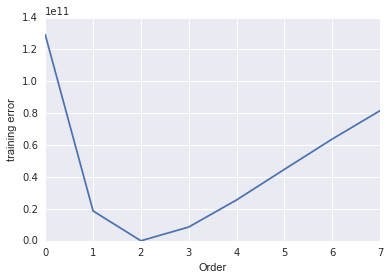

In [183]:
#plot training error
plt.plot(range(8), training_error)
plt.xlabel('Order')
plt.ylabel('training error')
plt.show()


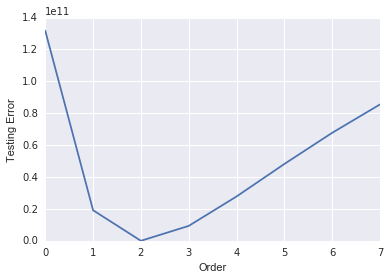

In [190]:
plt.plot(range(8), test_error)
plt.xlabel('Order')
plt.ylabel('Testing Error')
plt.show()


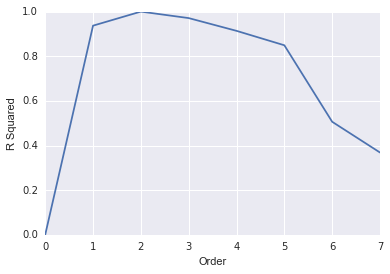

In [191]:
plt.plot(range(8), rsqrd)
plt.xlabel('Order')
plt.ylabel('R Squared')
plt.show()


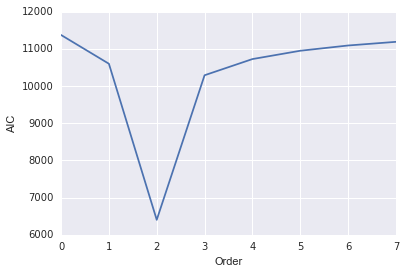

In [192]:
plt.plot(range(8), aic)
plt.xlabel('Order')
plt.ylabel('AIC')
plt.show()

# Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

Still working challenge 4!  Will resubmit this week.